# Overview 

Please see the [homework policy](https://fdl.thecoatlessprofessor.com/syllabus/#homework)
for detailed instructions and some grading notes. Failure to follow instructions
will result in point reductions. In particular, make sure to commit each 
exercise as you complete them. 

> "The future depends on some graduate student who is deeply suspicious of everything I have said."
> 
> -- Geoffrey Hinton (One of Deep Learning's Godfathers)

## Grading

The rubric CAs will use to grade this assignment is:

| Task                                                   | Pts |
|:-------------------------------------------------------|----:|
| Homework Policy                                        | 2   |
| Splitting the Bill                                     | 10  |
| I _vant_ to _manually_ read your data                  | 5   |
| Excellency at UIUC                                     | 20  |
| Total                                                  | 37  |


## Objectives 

The objectives behind this homework assignment are as follows:

- Implement functions in Python;
- Loading CSV data;
- Manipulating data; and,
- Visualizing Data.

# Assignment - Homework 1
STAT 430 - FDL, Spring 2020

Due: **Friday, February 7th, 2020 at 6:00 PM**

- **Author:** Josh Janda
- **NetID:** joshlj2


### Collaborators

If you worked with any other student in preparing these answers, please
make sure to list their full names and NetIDs (e.g. `FirstName LastName (NetID)` ).


In [1]:
print("Diagnostics: ")

try:
  from google.colab import drive
  is_google_colab = True
  import sys
  import pandas as pd
  import numpy as np

  print(f"python: {sys.version}")
  print(f"pandas: {np.__version__}")
  print("Notebook is on Google CoLab")
except:
  is_google_colab = False
  print("Notebook is begin run locally or through another source.")




Diagnostics: 
python: 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
pandas: 1.17.5
Notebook is on Google CoLab


## [2 points] Exercise 1: Homework Policy

Please uncomment the following statement when you have read and agreed
to the [homework policy](https://fdl.thecoatlessprofessor.com/syllabus/#homework/).
To _uncomment_ a statement in _text cell_, double click the _text cell_ and remove the `<!-- -->` surrounding the content.


I have read and agree to abide by the policies and procedures laid 
out by the [homework policy](https://fdl.thecoatlessprofessor.com/syllabus/#homework/).
                               
I understand that:

- I must independently write up solutions to homework problems.
    - Failure to do so will result in an academic integrity violation due to plagarism and more severe penalties.
- I must list the names of all collaborators that I work with at the top of my homework assignment.
- I understand that I can work with **at most** four other students in class. 
- I must supply my full name and netid at the top of the homework assignments.
- I will change the name of the Jupyter Notebook from `hwXX-assign.ipynb` to `hwXX-NetId.ipynb`.
- All code cells must be evaluated. 
- I will turn in my homework by uploading to Canvas.
    - There is no paper or e-mail turn-in available. 
- I understand that at 6:00 PM central time on the day the homework is due my ability to upload the assignment will be disabled
    - Any work not in the upload will _not_ be graded.
    - Any code cell not run, will not be graded.
- I will be able to drop **one** homework assignment over the course of the 
  semester. 
- I understand that any academic integrity violations (cheating or assisting others)
  will be punished to ensure a fair academic environment for all.
  


## [10 points] Exercise 2: Splitting the Bill

Develop a function that displays an itemized bill and provides the total a given person must pay.

Consider the following bill:

- James
  - Cold Brew: \$4.63
  - [Beef Bulgogi](https://en.wikipedia.org/wiki/Bulgogi): \$12.32
- Brianna
  - Tea: \$2.55
  - Muffin: \$1.88
  - [Poke bowl](https://en.wikipedia.org/wiki/Poke_(Hawaiian_dish)): \$10.69
- Cathy
  - [Margarita](https://en.wikipedia.org/wiki/Margarita): \$8.50

Implementation Guidelines:

- **Arguments:**
    - `x`: data structure holding the above example.
    - `first_name`: Obtain the total a given person owes.
- **Side-effect:**
    - Print an itemized version of the bill by person.
- **Return:**
    - The total value of all items ordered by requested person.

Example of output:

```python
bill_split(x, "James")
# Itemized Bill ----
# James pays $16.95
# * 4.63 for Cold Brew
# * 12.32 for Beef Bulgogi
# Brianna pays $15.12
# * 2.55 for Tea
# * 1.88 for Muffin
# * 10.69 for Poke Bowl
# Cathy pays $8.50
# * 8.50 for Margarita
# 16.95
```


In [2]:
def bill_split(x, first_name):

  total = {name : sum(items.values()) for name, items in x.items()} # compute total for each person

  print("Itemized Bill ----")

  for name in x.keys():

    print("{0} pays ${1}".format(name, total[name]))
    items = x[name] # get itemized list for each person

    for item, price in items.items():

      print("* {0} for {1}".format(price, item))

  return total[first_name]

x = {
      "James" : {
                  "Cold Brew" : 4.63,
                  "Beef Bulgogi" : 12.32
                 },
     "Brianna" : {
                  "Tea" : 2.55,
                  "Muffin" : 1.88,
                  "Poke Bowl" : 10.69
                 },
     "Cathy" : {
                  "Margarita" : 8.50
     }
}
bill_split(x, "James")

Itemized Bill ----
James pays $16.95
* 4.63 for Cold Brew
* 12.32 for Beef Bulgogi
Brianna pays $15.12
* 2.55 for Tea
* 1.88 for Muffin
* 10.69 for Poke Bowl
Cathy pays $8.5
* 8.5 for Margarita


16.95


## [5 points] Exercise 3: I _vant_ to manually read your data

Consider the following [Fall 2019 Freshman profile](http://dmi.illinois.edu/stuenr/abstracts/FA19freshman_ten.htm) made available by the [Division of Management Information (DMI)](http://dmi.illinois.edu).

- **(3 Points)** Translate the table from `markdown` to a pandas `DataFrame`

|College               | Number| Percent|
|:---------------------|------:|-------:|
|Agr, Cons, Env Sci    |    538|   0.070|
|Applied Health Sci    |    287|   0.037|
|Business              |    591|   0.077|
|Education             |    138|   0.018|
|Fine & Applied Arts   |    381|   0.050|
|General Studies       |   1498|   0.195|
|Grainger Engineering  |   1628|   0.212|
|Liberal Arts & Sci    |   2411|   0.315|
|Media                 |    142|   0.019|
|School of Social Work |     51|   0.007|

- **(2 Points)** Progmatically, find the maximum number of students

In [3]:
freshman_profile = {
                    "College" : ["Agr, Cons, Env Sci", "Applied Health Sci", "Business",
                                 "Education", "Fine & Applied Arts", "General Studies",
                                 "Grainger Engineering", "Liberal Arts & Sci", "Media",
                                 "School of Social Work"],
                    "Number" : [538, 287, 591, 138, 381, 1498, 1628, 2411, 142, 51],
                    "Percent" : [0.070, 0.037, 0.077, 0.018, 0.050, 0.195, 0.212, 0.315, 0.019, 0.007]
                    }
freshman_profile_df = pd.DataFrame(freshman_profile)
display(freshman_profile_df)

,College,Number,Percent
0,"Agr, Cons, Env Sci",538,0.070
1,Applied Health Sci,287,0.037
2,Business,591,0.077
3,Education,138,0.018
4,Fine & Applied Arts,381,0.050
5,General Studies,1498,0.195
6,Grainger Engineering,1628,0.212
7,Liberal Arts & Sci,2411,0.315
8,Media,142,0.019
9,School of Social Work,51,0.007


In [4]:
max_students = freshman_profile_df["Number"].max()
print("Max students is {0}".format(max_students))

Max students is 2411





## [20 points] Exercise 4: Excellency at UIUC

Under this exercise, we will explore the "Teachers Ranked As Excellent" data
at UIUC from Fall 1993 to Summer 2019 as compiled by 
[Wade Fagen-Ulmschneider](http://waf.cs.illinois.edu/).
The data is available from:

<https://raw.githubusercontent.com/wadefagen/datasets/master/teachers-ranked-as-excellent/uiuc-tre-dataset.csv> 

This data has a file extension of **CSV** form. Contained in the data are the following variables:

- `term`: Two letter semester code (`sp`, `su`, `fa`, or `wi`) followed by a four digit year.
    - Examples: `sp2017`, `fa2013`, `su2012`.
- `unit`: The CITL-supplied headers for the unit teaching the course.
    - Examples: `ACCOUNTANCY`, `SOCIAL WORK`, `LINGUISTICS`, `NUCLEAR, PLASMA & RAD. ENGR.`
- `lname`: The last name of the teacher.
    - Examples: `FAGEN-ULMSCHNEIDER`, `FLANAGAN`, `FLECK`
- `fname`: The first letter of the first name of the teacher.
    - Examples: `W`, `K`, `M`
- `role`: `Instructor` or `TA`
- `ranking`: `Excellent` or `Outstanding`
- `course`: The course the teacher was ranked as excellent.  If no course is given, the `course` field is set to `?` (this includes cases when the raw data lists the course as `0`, `000`, or `999`).
    - Examples: `199`, `225`, `560`, `?`

**[2 points] (a)** Import into _Python_ the data in `uiuc-tre-dataset.csv`. As `course` denotes a value that is
_not_ `NaN`, which is how _Python_ represents missing values, you must use the parameter 
`na_values = ['NA','?'] ` during the import with pandas.




In [0]:
teachers_data = pd.read_csv("https://raw.githubusercontent.com/wadefagen/datasets/master/teachers-ranked-as-excellent/uiuc-tre-dataset.csv",
                            na_values = ["NA", "?"])

**[4 points] (b)** Run a summary over the data. Within the summary
output, what variable output is different from the rest? What might have caused this?

In [6]:
teachers_data.describe()

,course
count,95988.000000
mean,298.804486
std,162.970493
min,2.000000
25%,142.000000
50%,260.000000
75%,429.000000
max,798.000000


Variable difference explanation:

Course is the only variable that is outputted, meaning that it is considered a numeric (float or integer) variable type. This is caused by Pandas inference, where it is infering the datatype of this variable is numeric even though it is truly categorical. The true meaning behind this variable is course numbers, so it does not make sense to generate summary statistics on this variable.

**[4 points] (c)** 

1. Verify that `course` has `NaN` values. 
2. Perform a median imputation to remove `NaN` values.


In [7]:
course_var_nan = teachers_data["course"].isnull().sum()
print("Course variable has {0} null values".format(course_var_nan))

median_course = teachers_data["course"].median()
teachers_data["course"].fillna(median_course, inplace = True)

Course variable has 1000 null values



**[4 points] (d)** 

1. Who was your favorite teacher at UIUC? Search for them in the list of excellency. 
  - _Hint_: Search the `lname` variable in the `DataFrame`.
  - _Hint_: Make sure to search the _last name_ with capital letters.

2. Compute the total number of times they appeared in the excellency ratings.



In [8]:
my_favorite_teacher = teachers_data.loc[teachers_data["lname"] == "UNGER"]
my_favorite_teacher = my_favorite_teacher.loc[teachers_data["fname"] == "D"]
favorite_teacher_appearances = my_favorite_teacher.count()[1]
print("David Unger appeared {0} times in the excellency ratings".format(favorite_teacher_appearances))

David Unger appeared 22 times in the excellency ratings


**[2 points] (e)** Drop the `fname` column in-place.

In [0]:
teachers_data.drop("fname", axis = 1, inplace = True)

**[2 points] (f)** Split the data into a training and testing data set. The weight should be 65% training and 35% testing.

In [0]:
train = teachers_data.sample(frac = .65, random_state = 27)
test = teachers_data.drop(train.index)


**[2 points] (g)** Create a bar plot on `role` to see the counts of how often a `Instructor` or `TA` make the list.

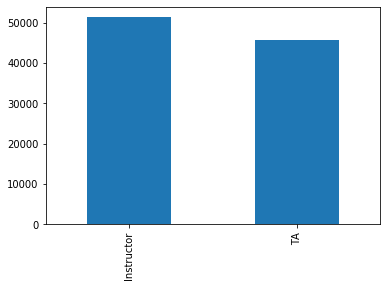

In [11]:
teachers_data["role"].value_counts().plot.bar()